# Data Gathering

In [ ]:
# !pip install

In [16]:
import steamreviews

# Basic libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sd
import numpy as np

# For text cleaning 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import json
import pandas as pd

In [111]:
import plotly as py
import cufflinks as cf 
import plotly.express as px
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
# Game: Momodora: Reverie Under The Moonlight
app_id = 428550
# Game: Pizza Game
# app_id = 710710

# set request parameters 
request_params = {}
request_params['language'] = 'english'

review_dict, query_count = steamreviews.download_reviews_for_app_id(app_id)
# review_dict = steamreviews.load_review_dict(app_id)

[appID = 428550] expected #reviews = 8565


In [6]:
review_dict['query_summary']

{'num_reviews': 100,
 'review_score': 8,
 'review_score_desc': 'Very Positive',
 'total_positive': 8045,
 'total_negative': 520,
 'total_reviews': 8565}

Example of a review scraped in json format.

In [8]:
data = steamreviews.load_review_dict(app_id)
data = data['reviews']
review_dataset = []

for id_num, info in data.items():
    review = {'id_num': id_num,
              'review':info['review'],
              'language':info['language'],
              'voted_up':info['voted_up']}
    
    review_dataset.append(review)

In [9]:
data['50585768']

{'recommendationid': '50585768',
 'author': {'steamid': '76561197986323776',
  'num_games_owned': 112,
  'num_reviews': 3,
  'playtime_forever': 79,
  'playtime_last_two_weeks': 0,
  'playtime_at_review': 79,
  'last_played': 1557556711},
 'language': 'english',
 'review': "There's a lot of things going for this game. Music, atmosphere, item collection, diverse enemies, etc. but one severe drawback from my pov.\nThe game is challenging but not necessarily in a healthy way. Enemies are positioned to attack where it came off as frustrating. With game design, players shouldn't need to approach a new area cautiously for negative surprises - we should clearly see and adapt without needing to die over and over unless we've memorized enemy layouts when they're unclear. It's the (main) difference between Super Mario versus the Syoban Cat game. This game felt as if it was developed to have more 'random' risks than reward.\nTo be fair, I only played an hour and a half on writing this review, but

In [132]:
df = pd.DataFrame(review_dataset)

In [134]:
df.sample(10)

id_num                                             review   language  \
5950  31135368  +ËêåÔºÅÔºÅÊàëÊØîËæÉÂñúÊ¨¢ÈÇ£‰∏™ÊëáÂ§¥ÁöÑÂÖîÂ≠ê‚Ä¶‚Ä¶\n+Â•ΩÂÉè‚Ä¶‚Ä¶Âè™ÊúâÂ•≥ÊÄßËßíËâ≤Ôºü\n+‰∏äÊù•Â∞±ÈÄâ‰∫Ü‰∏™Âõ∞ÈöæÔºåÁªìÊûú...   schinese   
4521  39329769                                   Retro Darksouls.    english   
3904  43380678  ÁÆÄÂçïÔºö\nÊãøÂà∞Á¨¨‰∏Ä‰∏™ÂøÉ‰πãÂÆπÂô®Êó∂Ôºö‚Äú‰Ω†Ëé∑Âæó‰∫ÜÂøÉ‰πãÂÆπÂô®Ôºå‰ΩÜ‰Ω†ÁöÑhp‰∏äÈôêÂ∑≤Áªè‰∏∫ÊúÄÂ§ßÂÄºÔºåÊó†Ê≥ïÂ¢ûÂä†‰∫ÜÔºÅ...   schinese   
5926  31280212  Una perla del suo genere, non star√≤ qua a dirv...    italian   
4632  38572009                              ‰Ω†Âè™ËÉΩÁúãÂà∞‰∏§Ê¨°Â•∂Â≠êÔºÅÔºÅÔºÅÔºÅÂ∑ÆËØÑÔºÅÔºÅÔºÅÔºÅÔºÅÔºÅ   schinese   
150   90431762  Pretty good Metroidvania game, but if there's ...    english   
1833  58407760  Uma obra de arte a unica coisa ruim do jogo √© ...  brazilian   
3889  43447138                                                Yes    english   
4333  40411904  Castlevania+Dark Souls=Momodora: Reverie Under...    russian   
4082  42173121  [b]Story:[/b] The story was fairly intriguing....    english   

      voted_up  
5950      True  
4521      True  
3904      True  
5926      True  
4632      True  
150       True  
1833      True  
3889      True  
4333      True  
4082     False

In [135]:
# languages
df_lan = df['language']
df_lan_value_counts = df_lan.value_counts()
df_lan_value_counts.iplot(kind='bar', 
                          xTitle='Language', 
                          yTitle='Number of Reviews', 
                          title='Languages in Steam Reviews')

- English is the prominent language as expected, accounts for nearly 50% of the reviews. In our study, we will only work with English reviews as they offer a reasonable amount of positive and negative reviews for our analysis.

# Basic Text Data Preprocessing

In [137]:
# keep only the english reviews 
df = df[df['language']=='english']
df = df.drop(['id_num', 'language'], axis=1)

In [136]:
# change 'voted_up' to 'recommended'
df = df.rename(columns={"voted_up": "Recommended"})

In [138]:
# check for null values 
df.isnull().sum()

review         0
Recommended    0
dtype: int64

In [139]:
# reset index
df = df.reset_index(drop=True)

# Basic Data Analysis

We look at the number of reviews that have recommended the game or not. 

In [142]:
px.histogram(df, x='Recommended', color='Recommended').update_yaxes(title='Number of Reviews')

We see that the number of users who have recommended the game overshadows those who don‚Äôt recommend it. Now keep this one in mind, the amount of reviews recommending the game does indicate something about the game itself and how we‚Äôre going to see the reasons behind the recommendation.

# Text Cleaning

In [80]:
' '.join(df['review'].tolist())

'A short but sweet metroidvania that is worth your time, especially if you like getting difficult achievements! awooooo Fun game, but a bit too easy imo Momodora: RUtM is the 4th game in the series and easily the best. It\'s a 2-d action platformer with a simple yet rewarding combat system and difficulty options aplenty. The game is pretty short, about 4 hours on my first play-through (on switch). If you play on normal, I would recommend a second play-through on insane, which adds enemies and drastically lowers the player health bar. Other than that, there isn\'t a ton of replay value unless you want to find all the hidden collectibles. Nevertheless, I would definitely recommend this game. . Short but sweet It\'s really fun! If you like games like Rabi-Ribi or Metroidvania  games in general you\'d def like this game!! Man, it\'s short enuf that my monke brain was able to finish it twice within 7.4hrs. Pacifist achievement tho..enemies just decide that suicide is the best route so it be

In [95]:
# save a copy of the dataframe before any preprocessing
df_1 = df.copy()

Some important cleaning to do with the reviews:
- Uncontract any words to their full form: This usually makes it easier to clean text data and is an optional step. Examples are words like ain‚Äôt or we‚Äôll, which is converted into ‚Äòis not‚Äô or ‚Äòwe will‚Äô.
- Remove any stopwords: These are words that do not provide any sort of information to what we‚Äôre trying to find or just appear way too frequently. Articles and prepositions are examples of stopwords.
- Punctuations, emojis and emoticons, numbers: They‚Äôre not words, so it‚Äôs best to remove them.
- Parts-of-speech: These are tags that indicate the position of the word in the sentence, whether they‚Äôre a noun, verb, preposition, etc.
- Lemmatization: It‚Äôs a technique or method where the words are converted back into their root or base form, such as converting the word ‚Äòconfusing‚Äô to the base form ‚Äòconfused‚Äô. Makes it easier to understand the words for analysis. The POS tag is also used to lemmatize the words based on their position.

D:\Anaconda3\envs\steam_insider\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Recommended', ylabel='count'>

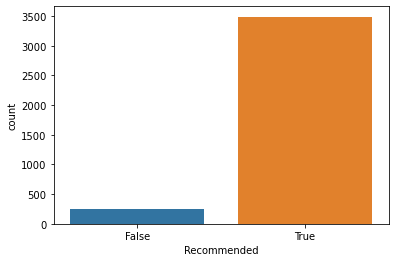

In [10]:
sd.countplot('Recommended',data=text_df)

In [11]:
text_df['Review'] = text_df['Review'].astype(str)
text_df['Length'] = text_df['Review'].apply(lambda x : len(x.split()))

In [12]:
recc_length = text_df[text_df['Recommended'] == True]
norecc_length = text_df[text_df['Recommended'] == False]

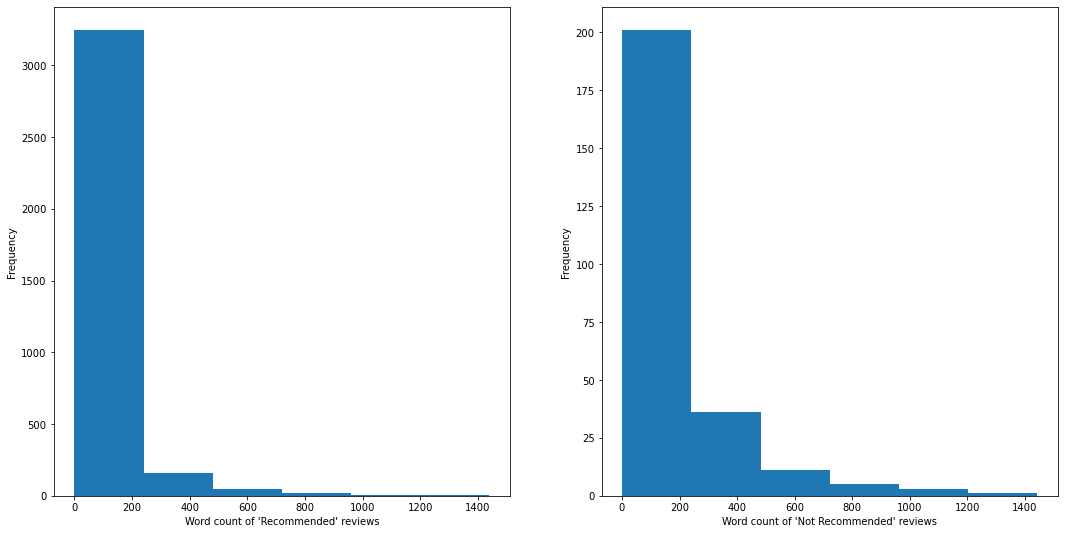

In [13]:
# use same scale 
fig, (ax1,ax2) = pypl.subplots(1,2,figsize=(18,9))

ax1.hist(recc_length['Length'].values,bins=6)
ax1.set(xlabel='Word count of \'Recommended\' reviews',ylabel='Frequency')
ax2.hist(norecc_length['Length'].values,bins=6)
ax2.set(xlabel='Word count of \'Not Recommended\' reviews',ylabel='Frequency')
pypl.show()

# Data Cleaning

In [14]:
text_df.head(10)

Review Language  Recommended  \
1   Absolutely loved this game and the entire atmo...  english         True   
2                  Good game overall, would recommend  english         True   
11  I recently finished this game after looking th...  english         True   
13                      Better than Hollow Knight tbh  english         True   
15  This is a game you really need to take your ti...  english         True   
17  Cute, fun and addictive metroidvania that pull...  english         True   
18  Hardcore in the bad way. Trial and error desig...  english        False   
30  Graphically pretty, challenging but not frustr...  english         True   
31  If you love Castlevania, you'll probably feel ...  english         True   
35  Recommended to me by a friend who knew I loved...  english         True   

    Length  
1       17  
2        5  
11     173  
13       5  
15      71  
17      22  
18      19  
30      65  
31      30  
35      76

In [15]:
import string

contract = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

stopword = stopwords.words('english')
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def penntag(pen):
    morphy_tag = {'NN': 'n', 'JJ': 'a',
                  'VB': 'v', 'RB': 'r'}
    try:
        return morphy_tag[pen[:2]]
    except:
        return 'n'


def comment_cleaner(comm):
    temp_comm = []
    megos = ' '

    # Uncontract any contracted words in our sentences
    uncontracted = ' '.join([contract[word] if word in contract else word for word in comm.lower().split()])

    # Remove any stopwords in our sentences
    stopwords_removed = [word for word in uncontracted.lower().split() if word not in stopword]

    # Use parts-of-speech to regain context after lemmatization 
    POS_words = nltk.pos_tag(stopwords_removed)

    for i in range(0, len(POS_words)):

        # Lemmatize words based on whether they are a noun, preposition etc. based on position
        lemmas = lemma.lemmatize(POS_words[i][0], pos=penntag(POS_words[i][1]))

        # Append or join the words together
        temp_comm.append(lemmas)
    
    # Combine the words into a sentence
    megos = ' '.join(word for word in temp_comm)
    return megos

In [16]:
text_df['Review'] = text_df['Review'].str.replace('[^\w\s]',' ')
text_df['Review'] = text_df['Review'].str.replace('[\d+]',' ')
text_df['Review'] = text_df['Review'].str.replace('(^| ).(( ).)*( |$)',' ')
text_df['Review'] = text_df['Review'].apply(lambda r : comment_cleaner(r))

In [17]:
text_df.head(10)

Review Language  Recommended  \
1   absolutely loved game entire atmosphere everyt...  english         True   
2                   good game overall would recommend  english         True   
11  recently finish game look steam library game t...  english         True   
13                             well hollow knight tbh  english         True   
15  game really need take time rush every section ...  english         True   
17  cute fun addictive metroidvania pull enjoyable...  english         True   
18  hardcore bad way trial error design hidden ins...  english        False   
30  graphically pretty challenge frustratingly har...  english         True   
31  love castlevania probably feel home lot say st...  english         True   
35  recommend friend know love waifus man game tur...  english         True   

    Length  
1       17  
2        5  
11     173  
13       5  
15      71  
17      22  
18      19  
30      65  
31      30  
35      76

In [18]:
recc_df = text_df[text_df['Recommended']==True]
notrecc_df = text_df[text_df['Recommended']==False]

In [19]:
count_vect = CountVectorizer(ngram_range=(2,2),stop_words=['game']).fit(text_df['Review'])

In [20]:
def plot_common_ngrams(texts):

    words = count_vect.transform(texts)
    sum_words = words.sum(axis=0)

    ngram_count = []

    for word,index in count_vect.vocabulary_.items():
        ngram_count.append((word,sum_words[0,index]))

    sorted_ngram_count = sorted(ngram_count,key=lambda x: x[1],reverse=True)

    sorted_ngram_count = sorted_ngram_count[:30]

    x = []
    y = []

    for i in sorted_ngram_count:
        x.append(i[0])
        y.append(i[1])

    fig = pypl.figure(figsize=(15,15))
    pypl.barh(x,y)
    fig.gca().invert_yaxis()
    return fig

D:\Anaconda3\envs\steam_insider\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


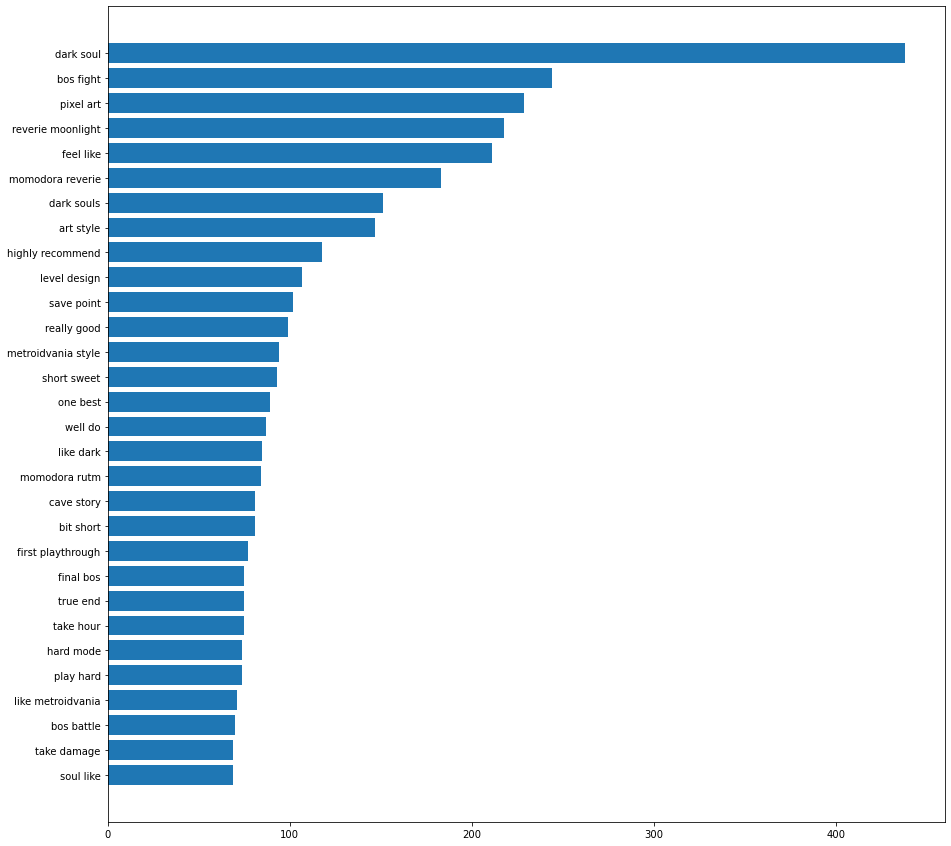

In [21]:
pos_plot = plot_common_ngrams(recc_df['Review'])
pos_plot.show()

D:\Anaconda3\envs\steam_insider\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


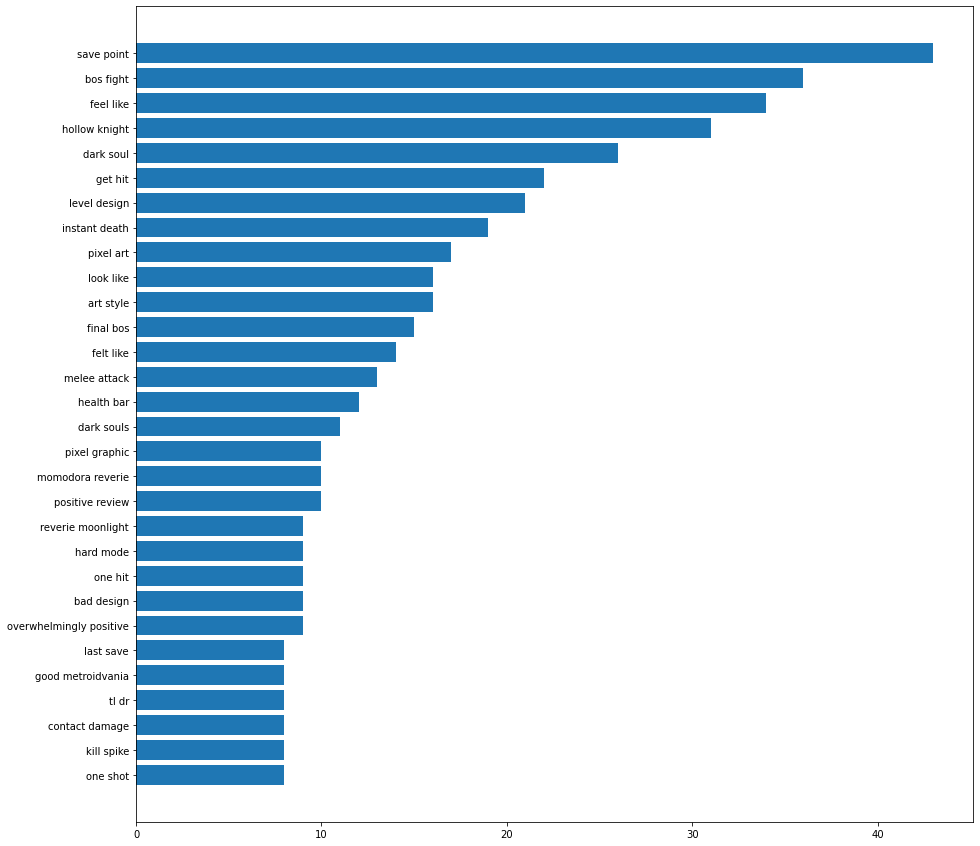

In [22]:
neg_plot = plot_common_ngrams(notrecc_df['Review'])
neg_plot.show()

# Tf-Idf modeling

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfvec = TfidfVectorizer(ngram_range=(2,2),stop_words=['game'],max_df=0.9,use_idf=True)
tfvec.fit(text_df['Review'])

TfidfVectorizer(max_df=0.9, ngram_range=(2, 2), stop_words=['game'])

In [25]:
mx = tfvec.transform(notrecc_df['Review'])
fv_tfidf = mx[0]
pdf = pd.DataFrame(fv_tfidf.T.todense(),index=tfvec.get_feature_names(),columns=['tfidf'])
pdf.sort_values(by=["tfidf"],ascending=False)[:15]

tfidf
hidden instakill     0.285144
save fuck            0.285144
hardcore bad         0.285144
error design         0.285144
instakill trap       0.285144
way trial            0.285144
design hidden        0.285144
trap lose            0.285144
lose everything      0.261989
everything since     0.261989
bad way              0.248444
since last           0.243294
trial error          0.215679
last save            0.211744
platformer seriusly  0.000000

In [26]:
mx = tfvec.transform(recc_df['Review'])
fv_tfidf = mx[0]
pdf = pd.DataFrame(fv_tfidf.T.todense(),index=tfvec.get_feature_names(),columns=['tfidf'])
pdf.sort_values(by=["tfidf"],ascending=False)[:15]

tfidf
include visuals        0.341703
feel clean             0.341703
entire atmosphere      0.341703
visuals highly         0.341703
loved entire           0.341703
clean include          0.341703
atmosphere everything  0.325472
absolutely loved       0.297724
everything feel        0.269976
highly recommend       0.178813
platformer really      0.000000
platformer right       0.000000
platformer seriusly    0.000000
platformer pretty      0.000000
platformer seamlessly  0.000000

# Topic Modeling

In [27]:
from sklearn.decomposition import LatentDirichletAllocation

In [28]:
lda = LatentDirichletAllocation(n_components=10)
lda_count = count_vect.fit_transform(recc_df['Review'])

lda.fit_transform(lda_count)

array([[0.00909143, 0.00909165, 0.00909103, ..., 0.91817636, 0.00909173,
        0.00909202],
       [0.02500079, 0.02500085, 0.02500181, ..., 0.02500123, 0.02500129,
        0.02500462],
       [0.0013334 , 0.00133342, 0.98799918, ..., 0.00133348, 0.00133344,
        0.00133339],
       ...,
       [0.025     , 0.025     , 0.02500297, ..., 0.77499422, 0.025     ,
        0.025     ],
       [0.01666667, 0.01666705, 0.01666779, ..., 0.84999507, 0.01666667,
        0.01666785],
       [0.01250097, 0.01250141, 0.01250169, ..., 0.88748308, 0.01250617,
        0.01250136]])

In [29]:
topic_arr = []

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        temps = []
        for i in topic.argsort()[:-top_n-1:-1]:    
            temps.append((vectorizer.get_feature_names()[i]))
        topic_arr.append(temps)
    
print_topics(lda,count_vect)

In [30]:
rows = [f'Topic {i}' for i in range(0,10)]
tpi = pd.DataFrame(topic_arr)
tpi.index = rows
tpi.T

Topic 0            Topic 1            Topic 2             Topic 3  \
0         dark soul          dark soul          dark soul           dark soul   
1         feel like          feel like          pixel art           pixel art   
2         pixel art  reverie moonlight          bos fight           bos fight   
3        dark souls          pixel art         dark souls           feel like   
4       really good          bos fight          like dark         worth price   
5         bos fight   momodora reverie          art style          dark souls   
6  highly recommend          first run          soul like   first playthrough   
7  recommend anyone         dark souls  like metroidvania  metroidvania style   
8        really fun   highly recommend          bit short          save point   
9       short sweet          art style          take hour   reverie moonlight   

             Topic 4             Topic 5            Topic 6  \
0          dark soul           dark soul  reverie moonlight   
1  reverie moonlight           bos fight   momodora reverie   
2          bos fight           pixel art          pixel art   
3   momodora reverie           feel like          dark soul   
4          pixel art    momodora reverie          feel like   
5            well do   reverie moonlight          art style   
6        really good          dark souls          bos fight   
7          feel like  metroidvania style       level design   
8   highly recommend          well worth         maple leaf   
9           one best  great metroidvania         cave story   

             Topic 7           Topic 8            Topic 9  
0          dark soul         dark soul  reverie moonlight  
1          feel like         bos fight          bos fight  
2          bos fight         feel like   momodora reverie  
3          pixel art        save point           one best  
4        pretty good         art style          pixel art  
5       level design  highly recommend          dark soul  
6  reverie moonlight     momodora rutm         dark souls  
7          hard mode        dark souls   highly recommend  
8          play hard         pixel art        short sweet  
9         bos battle          one best          art style

In [31]:
lda = LatentDirichletAllocation(n_components=10)
rfd = count_vect.fit_transform(notrecc_df['Review'])

dlad = lda.fit_transform(rfd)

In [32]:
topa = []

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        topi = []
        for i in topic.argsort()[:-top_n-1:-1]:    
            topi.append((vectorizer.get_feature_names()[i]))
        topa.append(topi)
    
print_topics(lda,count_vect)

In [33]:
rows = [f'Topic {i}' for i in range(0,10)]
tpi = pd.DataFrame(topa)
tpi.index = rows
tpi.T

Topic 0           Topic 1        Topic 2          Topic 3  \
0     hollow knight  keyboard control  hollow knight        art style   
1        save point    look elsewhere      feel like    design choice   
2         bos fight         way short     save point  positive review   
3    nothing happen         dark soul   melee attack        look good   
4         art style         art style  instant death    hollow knight   
5             tl dr    little variety   blind forest        good look   
6         final bos  different attack      ori blind       save point   
7         feel like       worth price   souls series          like go   
8   would recommend     regular enemy     dark souls           go buy   
9  collision damage           go back      bos fight        seem like   

          Topic 4        Topic 5        Topic 6            Topic 7  \
0       feel like      pixel art      dark soul            get hit   
1       bos fight      felt like  pixel graphic         save point   
2      kill spike      final bos      bos fight          bos fight   
3      bad design      dark soul     save point      hollow knight   
4      save point      art style      feel like       level design   
5    level design  anything else    retro pixel       melee attack   
6       look like      bos fight      look like         easy avoid   
7    instant kill        bad end       roll hit  good metroidvania   
8  contact damage     enemy type     really bad        boss attack   
9       hard mode     bug reward  hollow knight           get good   

             Topic 8            Topic 9  
0          feel like         save point  
1       level design  reverie moonlight  
2      hollow knight     symphony night  
3  like metroidvania       level design  
4          bos fight          dark soul  
5         could much   momodora reverie  
6            one hit      instant death  
7        axiom verge          pixel art  
8       good control            get hit  
9         health bar         every time